In [3]:
# Importando as bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando a base
cidade = pd.read_csv("arquivo.csv")

# Removendo valores nulos e valores iguais a 0
cidade = cidade.dropna()
cidade = cidade[cidade['IDHM'] != 0]
cidade = cidade[cidade['IDHM_Longevidade'] != 0]
cidade = cidade[cidade['IDHM_Educacao'] != 0]
cidade = cidade[cidade['GDP_CAPITA'] != 0]

# Inserindo a coluna "região" no dataset
cidade['REGIAO'] = cidade['STATE'].map({
    'AC': 'Norte', 'AM': 'Norte', 'RR': 'Norte', 'RO': 'Norte',
    'AP': 'Norte', 'PA': 'Norte', 'TO': 'Norte',
    'MA': 'Nordeste', 'PI': 'Nordeste', 'CE': 'Nordeste',
    'RN': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'AL': 'Nordeste', 'SE': 'Nordeste', 'BA': 'Nordeste',
    'MG': 'Sudeste', 'ES': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul',
    'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste'
})

# Alterando o nome das colunas
cidade = cidade.rename(columns={
    'IDHM': 'IDH', 'CITY': 'CIDADE', 'STATE': 'ESTADO',
    'IDHM_Longevidade': 'IDH_Longevidade', 'IDHM_Educacao': 'IDH_Educacao',
    'GDP_CAPITA': 'PIB_CAPITA', 'COMP_O': 'COMP_O',
    'COMP_E': 'COMP_E', 'COMP_Q': 'COMP_Q', 'CAPITAL': 'CAPITAL'
})

In [4]:
# Subset das 10 cidades classificadas apenas com IDH, divididas entre 10 melhores, 10 normalizadas e 10 piores

# Subset do top 10 cidades com o menor IDH
menor_idh = cidade[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao']]
menor_idh = menor_idh.sort_values('IDH').head(10)

# Subset do top 10 cidades com o maior IDH
maior_idh = cidade[cidade['IDH'] != 0]
maior_idh = maior_idh.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao']].head(10)

# Subset do top 10 cidades com o IDH normalizado
medio_idh = cidade[(cidade['IDH'] > 0.500) & (cidade['IDH'] < 0.799)]
medio_idh = medio_idh.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao']].head(10)


In [5]:
# Subset das cidades com as principais colunas, divididas entre alto, médio e baixo
cidade_boa = cidade[cidade['IDH'] != 0]
cidade_boa = cidade_boa.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']].head(10)

cidade_ruim = cidade[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']]
cidade_ruim = cidade_ruim.sort_values('IDH').head(10)

cidade_media = cidade[(cidade['IDH'] > 0.500) & (cidade['IDH'] < 0.799)]
cidade_media = cidade_media.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']].head(10)


In [6]:
# Subset das cidades com as principais colunas, divididas entre alto, médio e baixo com maior amplitude 
cidade_boa_50 = cidade[cidade['IDH'] != 0]
cidade_boa_50 = cidade_boa_50.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']].head(50)

cidade_ruim_50 = cidade[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']]
cidade_ruim_50 = cidade_ruim_50.sort_values('IDH').head(50)

cidade_media_50 = cidade[(cidade['IDH'] > 0.500) & (cidade['IDH'] < 0.799)]
cidade_media_50 = cidade_media_50.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']].head(100)


In [7]:
# Subset das cidades com maior IDH entre as capitais
maior_idh_capitais = cidade[(cidade['CAPITAL'] == True) & (cidade['IDH'] != 0)]
maior_idh_capitais = maior_idh_capitais.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']].head(26)

# Subset das cidades com maior IDH entre as não-capitais
maior_idh_nao_capitais = cidade[(cidade['CAPITAL'] == False) & (cidade['IDH'] != 0)]
maior_idh_nao_capitais = maior_idh_nao_capitais.sort_values('IDH', ascending=False)[['IDH', 'CIDADE', 'ESTADO', 'REGIAO', 'IDH_Longevidade', 'IDH_Educacao', 'PIB_CAPITA', 'COMP_O', 'COMP_E', 'COMP_Q']]


In [8]:
# Médias, Medianas, Modas e Desvio Padrão

# Média das principais colunas
md_ruim = cidade_ruim['IDH'].mean()
print(md_ruim)

md_mediano = cidade_media['IDH'].mean()
print(md_mediano)

md_alto = cidade_boa['IDH'].mean()
print(md_alto)

md_idh = cidade['IDH'].mean()
print(md_idh)

md_idh_edu = cidade['IDH_Educacao'].mean()
print(md_idh_edu)

md_idh_long = cidade['IDH_Longevidade'].mean()
print(md_idh_long)

md_pib_capita = cidade['PIB_CAPITA'].mean()
print(md_pib_capita)


# Mediana das principais colunas
mda_idh = cidade['IDH'].median()
print(mda_idh)

mda_idh_edu = cidade['IDH_Educacao'].median()
print(mda_idh_edu)

mda_idh_long = cidade['IDH_Longevidade'].median()
print(mda_idh_long)

mda_pib_capita = cidade['PIB_CAPITA'].median()
print(mda_pib_capita)

mda_ruim = cidade_ruim['IDH'].median()
print(mda_ruim)

mda_mediano = cidade_media['IDH'].median()
print(mda_mediano)

mda_alto = cidade_boa['IDH'].median()
print(mda_alto)


# Moda das principais colunas
mo_idh = cidade['IDH'].mode().values
print(mo_idh)

mo_idh_edu = cidade['IDH_Educacao'].mode().values
print(mo_idh_edu)

mo_idh_long = cidade['IDH_Longevidade'].mode().values
print(mo_idh_long)

mo_pib_capita = cidade['PIB_CAPITA'].mode().values
print(mo_pib_capita)

mo_ruim = cidade_ruim['IDH'].mode().values
print(mo_ruim)

mo_mediano = cidade_media['IDH'].mode().values
print(mo_mediano)

mo_alto = cidade_boa['IDH'].mode().values
print(mo_alto)


# Desvio padrão da variável target 
dp_ruim = cidade_ruim['IDH'].std()
print(dp_ruim)

dp_medio = cidade_media['IDH'].std()
print(dp_medio)

dp_alto = cidade_boa['IDH'].std()
print(dp_alto)

dp_geral_idh = cidade['IDH'].std()
print(dp_geral_idh)


0.4559
0.7968000000000001
0.8404
0.6592265540783327
0.5591726554078332
0.801601509162774
21127.982932087674
0.665
0.56
0.808
15884.5
0.453
0.797
0.8425
[0.71]
[0.568]
[0.823]
[7289. 7498. 7521. 8310.]
[0.453]
[0.796 0.797 0.798]
[0.845]
0.017660061658379834
0.0010327955589886455
0.012911665698549952
0.07199975456096135


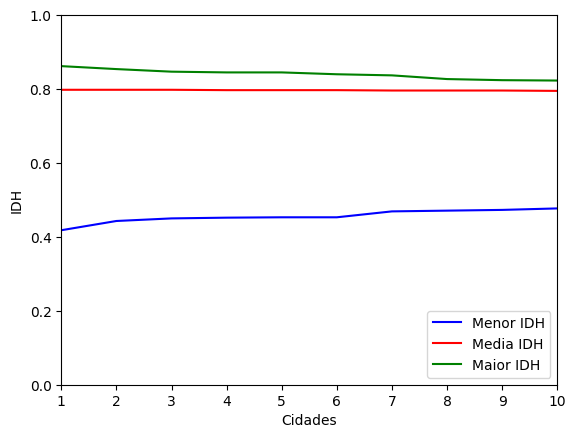

In [9]:
# Gráfico de linhas comparando o IDH das cidades de Alto IDH, Médio IDH e Baixo IDH
plt.plot(range(1, 11), menor_idh['IDH'], color='blue')
plt.plot(range(1, 11), medio_idh['IDH'], color='red')
plt.plot(range(1, 11), maior_idh['IDH'], color='green')

plt.xlim(1, 10)
plt.ylim(0, 1)
plt.xlabel('Cidades')
plt.ylabel('IDH')
plt.legend(['Menor IDH', 'Media IDH', 'Maior IDH'], loc='lower right')
plt.show()

      PIB_CAPITA  IDH_Longevidade
4748     83656.0            0.887
5563     41378.0            0.890
1773     39048.0            0.873
5491     60428.0            0.855
432      37429.0            0.894
4548     50545.0            0.852
3238     46202.0            0.854
2556     50765.0            0.891
719      79100.0            0.873
1458     44239.0            0.855


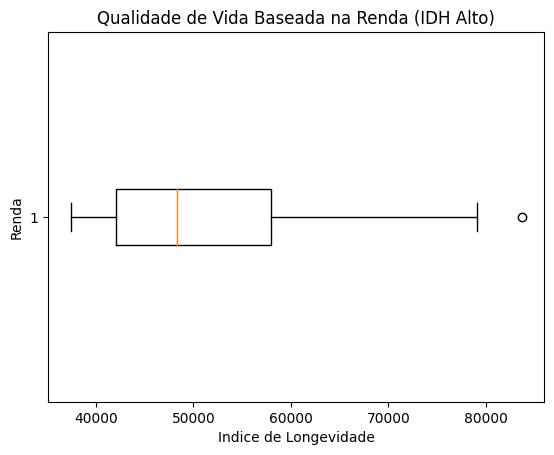

      PIB_CAPITA  IDH_Longevidade
4705     46889.0            0.843
2948     31473.0            0.854
1984     35348.0            0.886
4880     35230.0            0.846
1739     28883.0            0.872
4901     30716.0            0.871
2327     26726.0            0.881
5278     32904.0            0.866
1077     72125.0            0.835
2181     33445.0            0.891


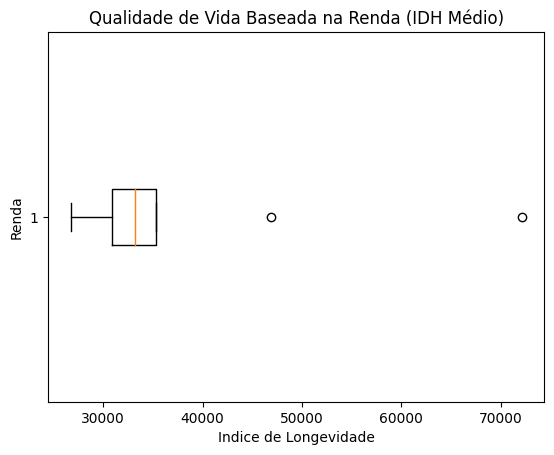

      PIB_CAPITA  IDH_Longevidade
3005      6558.0            0.776
1736      5121.0            0.728
383       9085.0            0.733
2886      6602.0            0.774
5334     10729.0            0.766
1213      7797.0            0.769
2562      9689.0            0.731
419       5775.0            0.777
809       5338.0            0.779
2298     10320.0            0.772


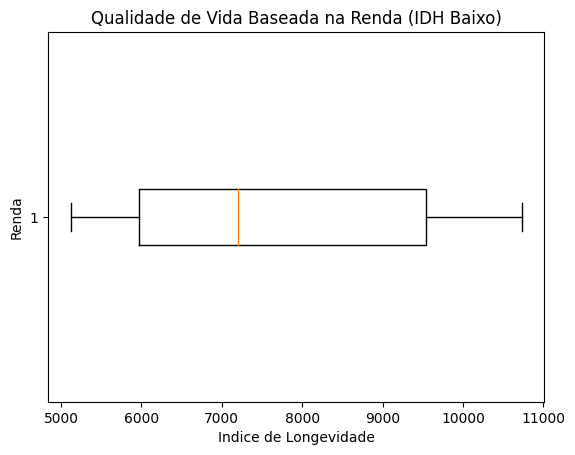

In [10]:
# Box plot do PIB per Capita x Índice de Longevidade entre as cidades de Alto IDH, Médio IDH e Baixo IDH
bp_bom = cidade_boa[['PIB_CAPITA', 'IDH_Longevidade']]
print(bp_bom.head(10))

plt.boxplot(bp_bom['PIB_CAPITA'], vert=False)
plt.xlabel('Indice de Longevidade')
plt.ylabel('Renda')
plt.title('Qualidade de Vida Baseada na Renda (IDH Alto)')
plt.show()


bp_medio = cidade_media[['PIB_CAPITA', 'IDH_Longevidade']]
print(bp_medio.head(10))

plt.boxplot(bp_medio['PIB_CAPITA'], vert=False)
plt.xlabel('Indice de Longevidade')
plt.ylabel('Renda')
plt.title('Qualidade de Vida Baseada na Renda (IDH Médio)')
plt.show()


bp_ruim = cidade_ruim[['PIB_CAPITA', 'IDH_Longevidade']]
print(bp_ruim.head(10))

plt.boxplot(bp_ruim['PIB_CAPITA'], vert=False)
plt.xlabel('Indice de Longevidade')
plt.ylabel('Renda')
plt.title('Qualidade de Vida Baseada na Renda (IDH Baixo)')
plt.show()


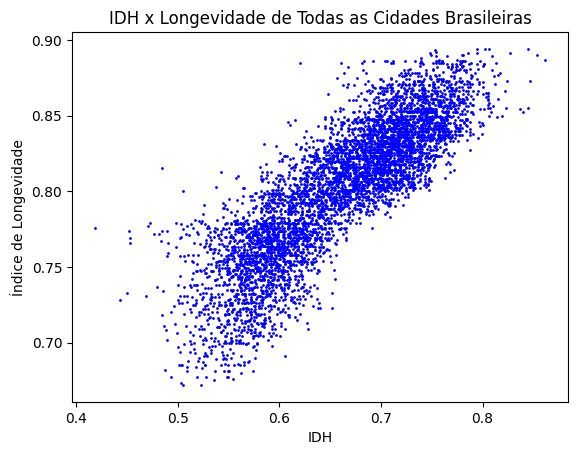

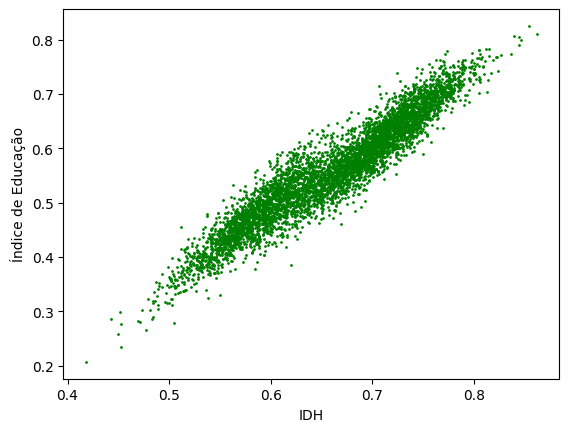

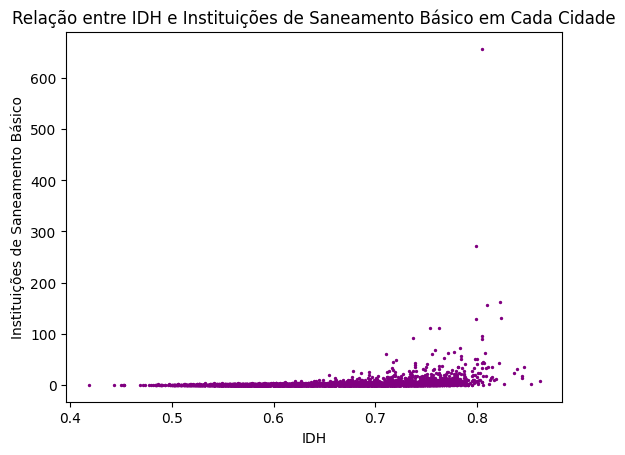

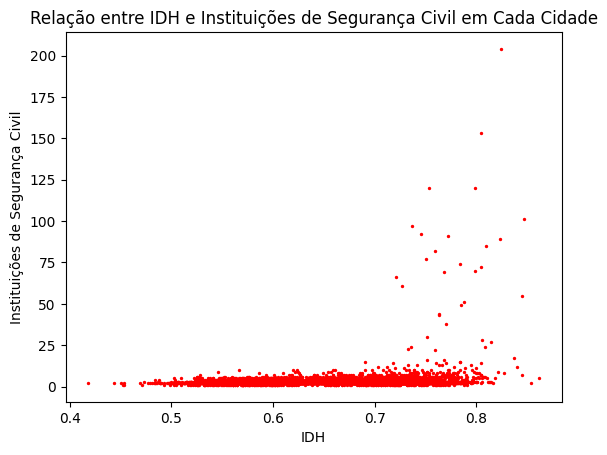

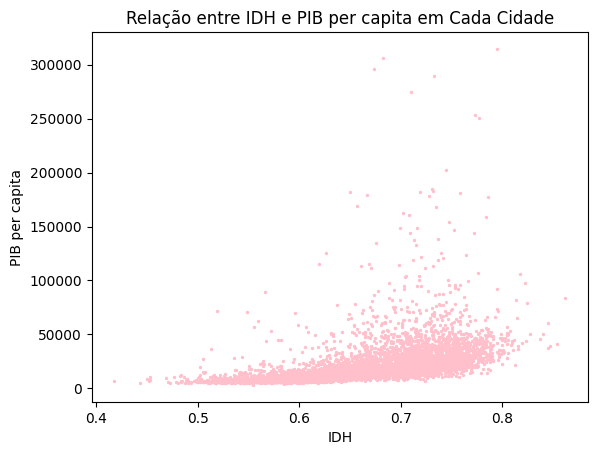

In [11]:
# Analisando a relação entre a variável target (IDH) e as demais colunas com gráfico de dispersão, utilizando todas as cidades do Brasil

# Scatter plot IDH x Longevidade Geral
plt.scatter(cidade['IDH'], cidade['IDH_Longevidade'], color='blue', s=1)
plt.title('IDH x Longevidade de Todas as Cidades Brasileiras')
plt.xlabel('IDH')
plt.ylabel('Índice de Longevidade')
plt.show()

# Scatter plot IDH x Educação Geral
plt.scatter(cidade['IDH'], cidade['IDH_Educacao'], color='green', s=1)
plt.xlabel('IDH')
plt.ylabel('Índice de Educação')
plt.show()

# Scatter plot IDH x COMP_E Geral
plt.scatter(cidade['IDH'], cidade['COMP_E'], color='purple', s=2)
plt.title('Relação entre IDH e Instituições de Saneamento Básico em Cada Cidade')
plt.xlabel('IDH')
plt.ylabel('Instituições de Saneamento Básico')
plt.show()

# Scatter plot IDH x COMP_O Geral
plt.scatter(cidade['IDH'], cidade['COMP_O'], color='red', s=2)
plt.title('Relação entre IDH e Instituições de Segurança Civil em Cada Cidade')
plt.xlabel('IDH')
plt.ylabel('Instituições de Segurança Civil')
plt.show()

# Scatter plot IDH x PIB_CAPITA Geral
plt.scatter(cidade['IDH'], cidade['PIB_CAPITA'], color='pink', s=2)
plt.title('Relação entre IDH e PIB per capita em Cada Cidade')
plt.xlabel('IDH')
plt.ylabel('PIB per capita')
plt.show()

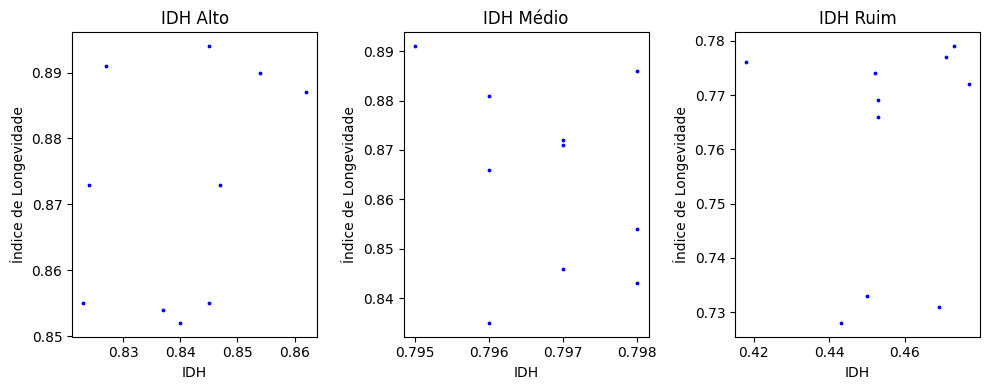

In [12]:
# Analisando a relação entre a variável target (IDH) e as demais colunas com gráfico de dispersão, utilizando Alto IDH, Médio IDH e Baixo IDH

# Scatter plot IDH x Longevidade 
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.scatter(cidade_boa['IDH'], cidade_boa['IDH_Longevidade'], color='blue', s=3)
plt.title('IDH Alto')
plt.xlabel('IDH')
plt.ylabel('Índice de Longevidade')

plt.subplot(132)
plt.scatter(cidade_media['IDH'], cidade_media['IDH_Longevidade'], color='blue', s=3)
plt.title('IDH Médio')
plt.xlabel('IDH')
plt.ylabel('Índice de Longevidade')

plt.subplot(133)
plt.scatter(cidade_ruim['IDH'], cidade_ruim['IDH_Longevidade'], color='blue', s=3)
plt.title('IDH Ruim')
plt.xlabel('IDH')
plt.ylabel('Índice de Longevidade')

plt.tight_layout()
plt.show()


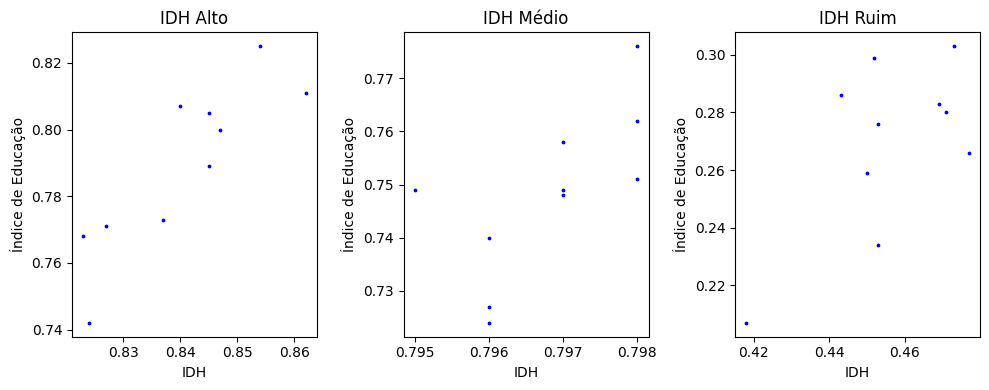

In [13]:
# Scatter plot IDH x Educação 
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.scatter(cidade_boa['IDH'], cidade_boa['IDH_Educacao'], color='blue', s=3)
plt.title('IDH Alto')
plt.xlabel('IDH')
plt.ylabel('Índice de Educação')

plt.subplot(132)
plt.scatter(cidade_media['IDH'], cidade_media['IDH_Educacao'], color='blue', s=3)
plt.title('IDH Médio')
plt.xlabel('IDH')
plt.ylabel('Índice de Educação')

plt.subplot(133)
plt.scatter(cidade_ruim['IDH'], cidade_ruim['IDH_Educacao'], color='blue', s=3)
plt.title('IDH Ruim')
plt.xlabel('IDH')
plt.ylabel('Índice de Educação')

plt.tight_layout()
plt.show()

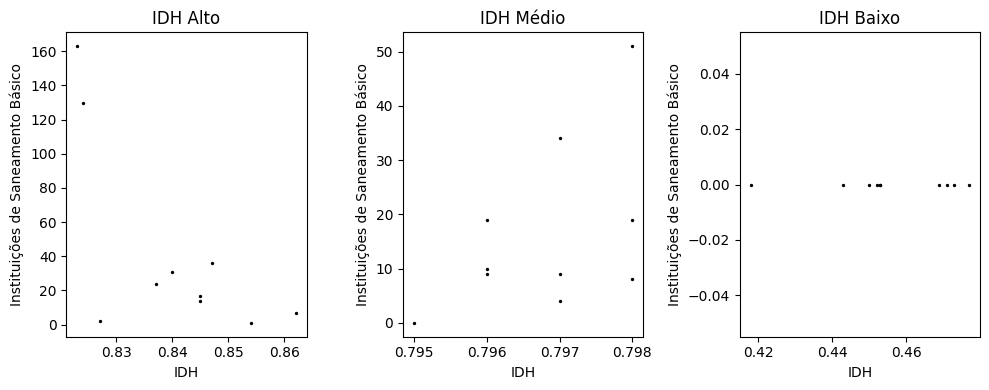

In [14]:
# Scatter plot IDH x COMP_E
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.scatter(cidade_boa['IDH'], cidade_boa['COMP_E'], color='black', s=2)
plt.title('IDH Alto')
plt.xlabel('IDH')
plt.ylabel('Instituições de Saneamento Básico')

plt.subplot(132)
plt.scatter(cidade_media['IDH'], cidade_media['COMP_E'], color='black', s=2)
plt.title('IDH Médio')
plt.xlabel('IDH')
plt.ylabel('Instituições de Saneamento Básico')

plt.subplot(133)
plt.scatter(cidade_ruim['IDH'], cidade_ruim['COMP_E'], color='black', s=2)
plt.title('IDH Baixo')
plt.xlabel('IDH')
plt.ylabel('Instituições de Saneamento Básico')

plt.tight_layout()
plt.show()

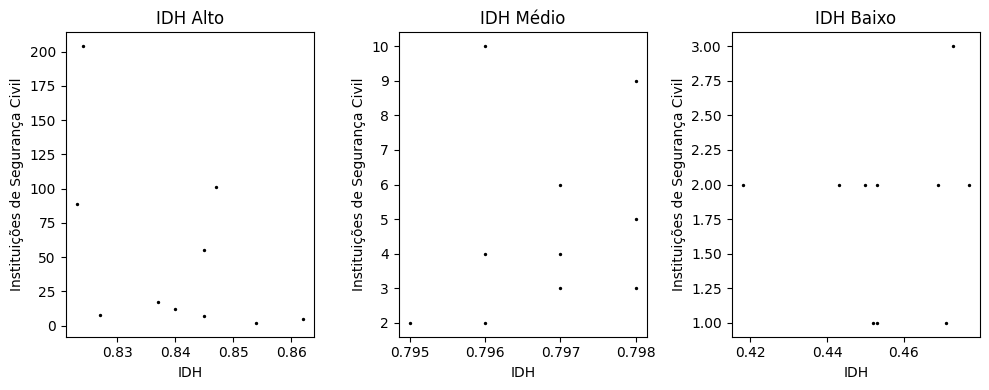

In [15]:
# Scatter plot IDH x COMP_O
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.scatter(cidade_boa['IDH'], cidade_boa['COMP_O'], color='black', s=2)
plt.title('IDH Alto')
plt.xlabel('IDH')
plt.ylabel('Instituições de Segurança Civil')

plt.subplot(132)
plt.scatter(cidade_media['IDH'], cidade_media['COMP_O'], color='black', s=2)
plt.title('IDH Médio')
plt.xlabel('IDH')
plt.ylabel('Instituições de Segurança Civil')

plt.subplot(133)
plt.scatter(cidade_ruim['IDH'], cidade_ruim['COMP_O'], color='black', s=2)
plt.title('IDH Baixo')
plt.xlabel('IDH')
plt.ylabel('Instituições de Segurança Civil')

plt.tight_layout()
plt.show()

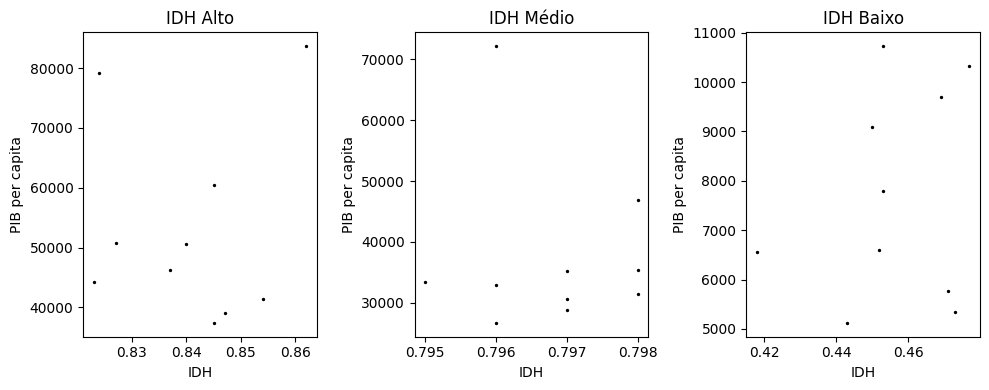

In [16]:
# Scatter plot IDH x COMP_O
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.scatter(cidade_boa['IDH'], cidade_boa['PIB_CAPITA'], color='black', s=2)
plt.title('IDH Alto')
plt.xlabel('IDH')
plt.ylabel('PIB per capita')

plt.subplot(132)
plt.scatter(cidade_media['IDH'], cidade_media['PIB_CAPITA'], color='black', s=2)
plt.title('IDH Médio')
plt.xlabel('IDH')
plt.ylabel('PIB per capita')

plt.subplot(133)
plt.scatter(cidade_ruim['IDH'], cidade_ruim['PIB_CAPITA'], color='black', s=2)
plt.title('IDH Baixo')
plt.xlabel('IDH')
plt.ylabel('PIB per capita')

plt.tight_layout()
plt.show()

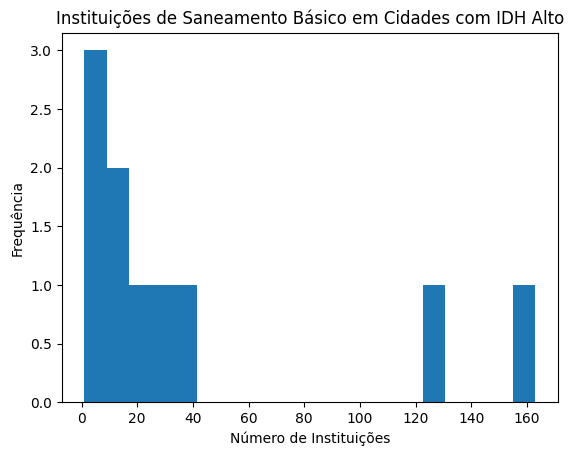

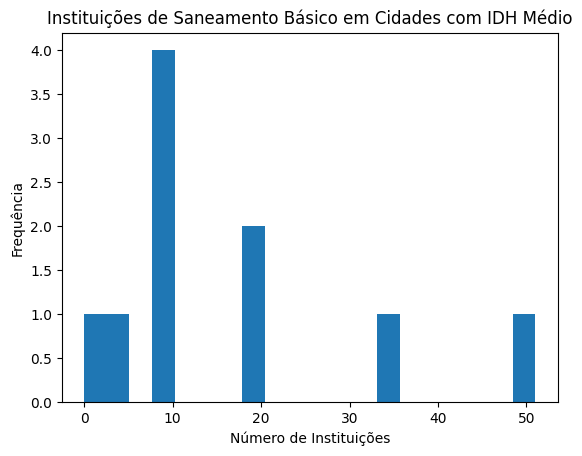

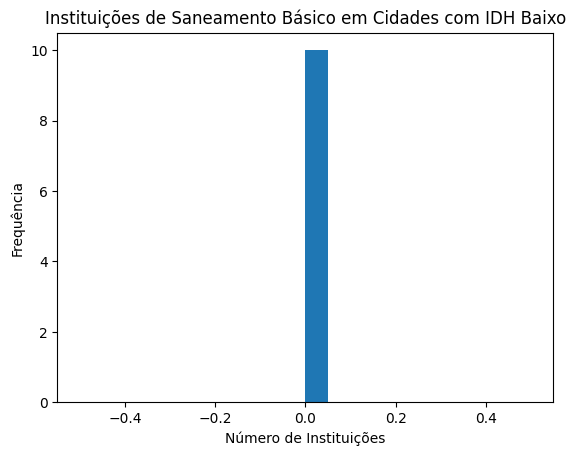

In [17]:
# Histograma número de instituições de saneamento básico utilizando as cidades de Alto IDH, Médio IDH e Baixo IDH
plt.hist(cidade_boa['COMP_E'], bins=20)
plt.title('Instituições de Saneamento Básico em Cidades com IDH Alto')
plt.xlabel('Número de Instituições')
plt.ylabel('Frequência')
plt.show()

plt.hist(cidade_media['COMP_E'], bins=20)
plt.title('Instituições de Saneamento Básico em Cidades com IDH Médio')
plt.xlabel('Número de Instituições')
plt.ylabel('Frequência')
plt.show()

plt.hist(cidade_ruim['COMP_E'], bins=20)
plt.title('Instituições de Saneamento Básico em Cidades com IDH Baixo')
plt.xlabel('Número de Instituições')
plt.ylabel('Frequência')
plt.show()


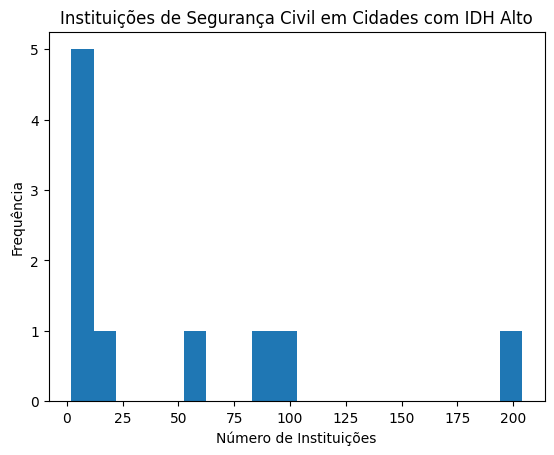

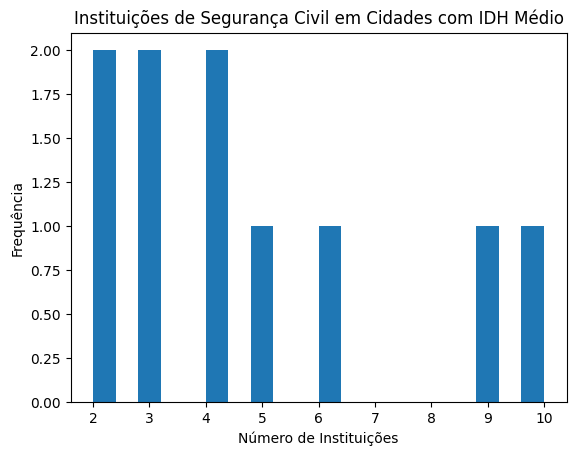

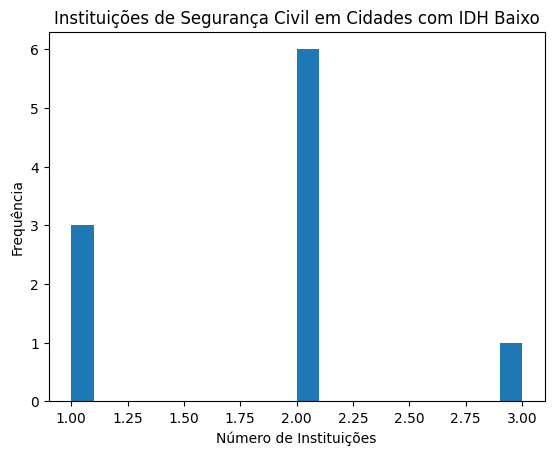

In [18]:
# Histograma número de instituições de segurança civil utilizando as cidades de Alto IDH, Médio IDH e Baixo IDH
plt.hist(cidade_boa['COMP_O'], bins=20)
plt.title('Instituições de Segurança Civil em Cidades com IDH Alto')
plt.xlabel('Número de Instituições')
plt.ylabel('Frequência')
plt.show()

plt.hist(cidade_media['COMP_O'], bins=20)
plt.title('Instituições de Segurança Civil em Cidades com IDH Médio')
plt.xlabel('Número de Instituições')
plt.ylabel('Frequência')
plt.show()

plt.hist(cidade_ruim['COMP_O'], bins=20)
plt.title('Instituições de Segurança Civil em Cidades com IDH Baixo')
plt.xlabel('Número de Instituições')
plt.ylabel('Frequência')
plt.show()

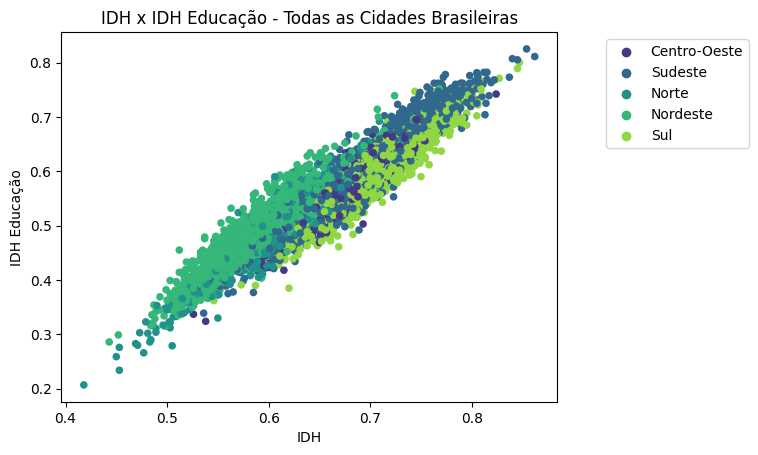

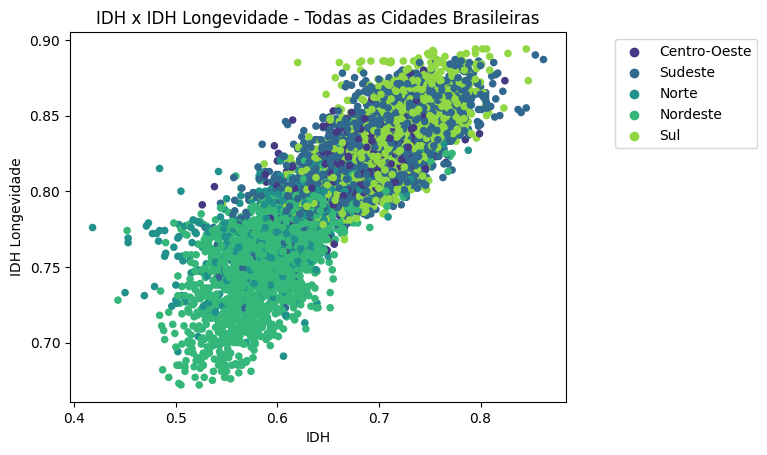

In [19]:
# Scatter plot de IDH x IDH Educação com todas as cidades do Brasil divididas por regiões 
sns.scatterplot(data=cidade, x='IDH', y='IDH_Educacao', hue='REGIAO', palette='viridis', s=30, edgecolor='none')
plt.title('IDH x IDH Educação - Todas as Cidades Brasileiras')
plt.xlabel('IDH')
plt.ylabel('IDH Educação')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

# Scatter plot de IDH x IDH Longevidade com todas as cidades do Brasil divididas por regiões 
sns.scatterplot(data=cidade, x='IDH', y='IDH_Longevidade', hue='REGIAO', palette='viridis', s=30, edgecolor='none')
plt.title('IDH x IDH Longevidade - Todas as Cidades Brasileiras')
plt.xlabel('IDH')
plt.ylabel('IDH Longevidade')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

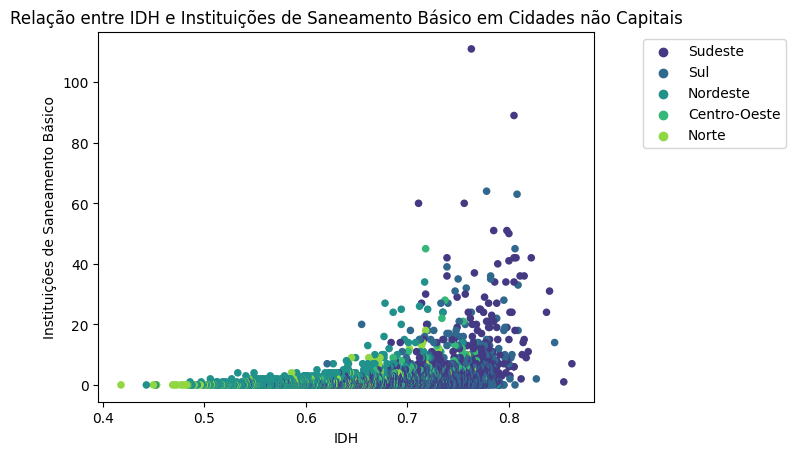

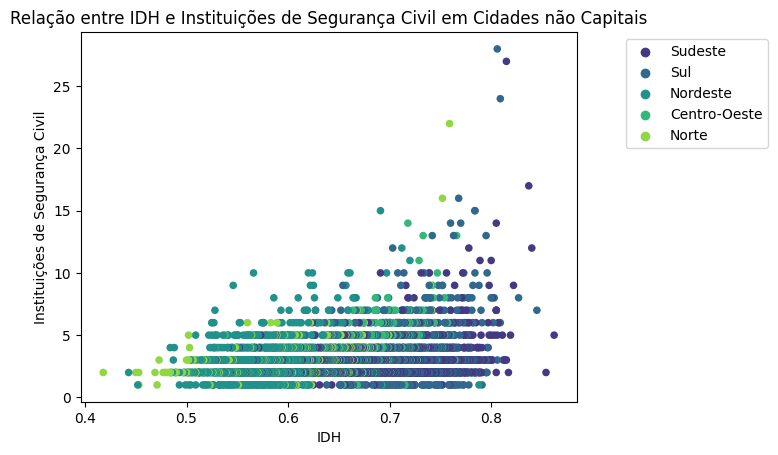

In [20]:
# Scatter plot das instituições de saneamento básico nas cidades que não são capitais
sns.scatterplot(data=maior_idh_nao_capitais, x='IDH', y='COMP_E', hue='REGIAO', palette='viridis', s=30, edgecolor='none')
plt.title('Relação entre IDH e Instituições de Saneamento Básico em Cidades não Capitais')
plt.xlabel('IDH')
plt.ylabel('Instituições de Saneamento Básico')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

# Scatter plot das instituições de segurança civil nas cidades que não são capitais
sns.scatterplot(data=maior_idh_nao_capitais, x='IDH', y='COMP_O', hue='REGIAO', palette='viridis', s=30, edgecolor='none')
plt.title('Relação entre IDH e Instituições de Segurança Civil em Cidades não Capitais')
plt.xlabel('IDH')
plt.ylabel('Instituições de Segurança Civil')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()